In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# y=2X+3

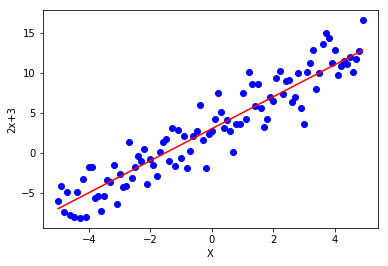

In [11]:
x=np.arange(-5,5,0.1)
y=2*x+3
y_noise = 2*np.random.normal(size=x.size)
y_data=y+y_noise
plt.plot(x,y_data,'bo')
plt.plot(x,y,'r')
plt.xlabel("X")
plt.ylabel("2x+3")
plt.show()


# y=ax^3+bx^2+cx+d       , a=1,b=2,c=3,d=4

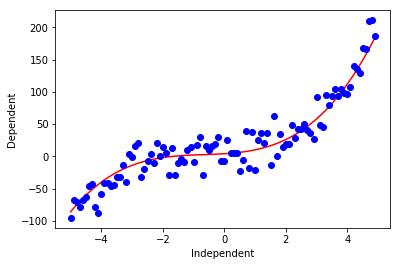

In [12]:
x=np.arange(-5.0,5.0,0.1)
y=(1*x**3)+(2*x**2)+(3*x)+4
y_noise=20*np.random.normal(size=x.size)
y_data=y+y_noise
plt.plot(x,y,'r')
plt.plot(x,y_data,'bo')
plt.xlabel("Independent")
plt.ylabel("Dependent")
plt.show()

# Y=X**2

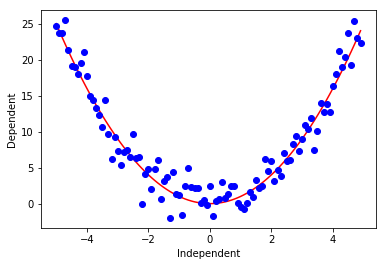

In [13]:
x=np.arange(-5.0,5.0,.1)
y=x**2
y_noise=2*np.random.normal(size=x.size)
y_data=y+y_noise
plt.plot(x,y,'r')
plt.plot(x,y_data,'bo')
plt.xlabel("Independent")
plt.ylabel("Dependent")
plt.show()

# y=exp(x)

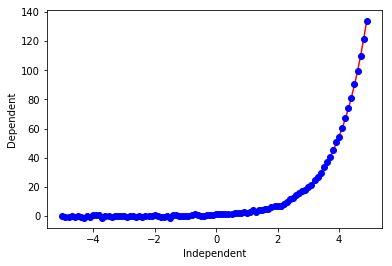

In [21]:
x=np.arange(-5.0,5.0,.1)
y=np.exp(x)
y_noise=0.5*np.random.normal(size=x.size)
y_data=y+y_noise
plt.plot(x,y,'r')
plt.plot(x,y_data,'bo')
plt.xlabel("Independent")
plt.ylabel("Dependent")
plt.show()

# y=log(x) 

F:\Installed Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


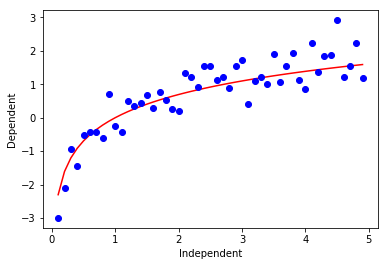

In [22]:
x=np.arange(-5.0,5.0,.1)
y=np.log(x)
y_noise=0.5*np.random.normal(size=x.size)
y_data=y+y_noise
plt.plot(x,y,'r')
plt.plot(x,y_data,'bo')
plt.xlabel("InSigmoidal/Logisticdependent")
plt.ylabel("Dependent")
plt.show()

# Sigmoidal/Logistic

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$     

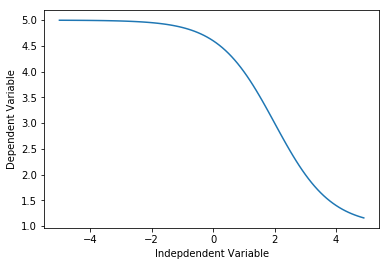

In [26]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1+4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# Non Linear Regression

In [27]:
df=pd.read_csv("china_gdp.csv")
df.head(9)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10


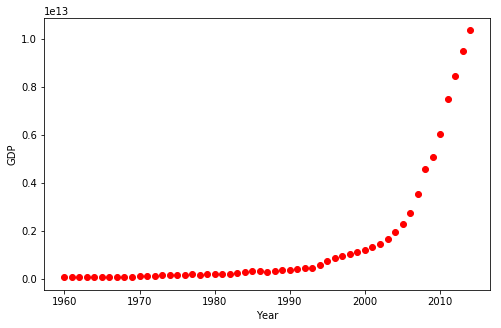

In [30]:
plt.figure(figsize=(8,5))
x_data=df['Year']
y_data=df['Value']
plt.plot(x_data,y_data,'ro')
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

In [32]:
def sigmoid(x,Beta_1,Beta_2):
    y=1/(1+np.exp(-Beta_1*(x-Beta_2)))
    return y

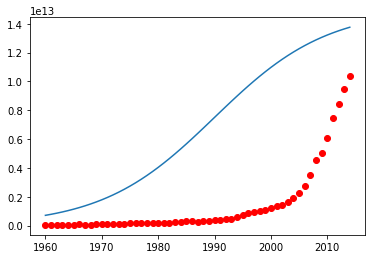

In [33]:
beta_1=0.10
beta_2=1990.0
Y_pred=sigmoid(x_data,beta_1,beta_2)
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [34]:
x_data=x_data/max(x_data)
y_data=y_data/max(y_data)

In [37]:
from scipy.optimize import curve_fit
popt,pcov=curve_fit(sigmoid,x_data,y_data)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


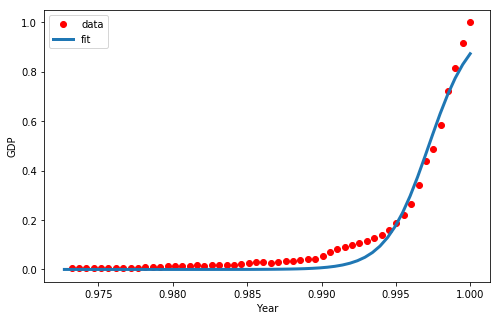

In [39]:
x=np.linspace(1960,2015,55)
x=x/max(x)
plt.figure(figsize=(8,5))
y=sigmoid(x,*popt)
plt.plot(x_data, y_data, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [40]:
mask=np.random.rand(len(df))<0.8

In [41]:
train_x=x_data[mask]
train_y=y_data[mask]
test_x=x_data[~mask]
test_y=y_data[~mask]

In [42]:
popt,pcov=curve_fit(sigmoid,train_x,train_y)
y_hat = sigmoid(test_x, *popt)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: 0.95
